In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Path to the dataset
file_path = 'data/delivery data.csv'

In [22]:
# Load the CSV data
data = pd.read_csv(file_path)

In [23]:
# Display the first few rows
print(data.head())
# Check for missing values
print(data.isnull().sum())
import pandas as pd

       ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  

In [24]:
# Load the dataset
file_path = 'data/delivery data.csv'
data = pd.read_csv(file_path)

In [25]:
# Fill missing values for numeric columns with median
data['Delivery_person_Age'] = data['Delivery_person_Age'].fillna(data['Delivery_person_Age'].median())
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].median())
data['multiple_deliveries'] = data['multiple_deliveries'].fillna(data['multiple_deliveries'].median())

# Fill missing values for categorical columns with mode
data['Weather_conditions'] = data['Weather_conditions'].fillna(data['Weather_conditions'].mode()[0])
data['Road_traffic_density'] = data['Road_traffic_density'].fillna(data['Road_traffic_density'].mode()[0])
data['Festival'] = data['Festival'].fillna(data['Festival'].mode()[0])
data['City'] = data['City'].fillna(data['City'].mode()[0])

# Impute missing values in 'Time_Orderd' with the mode
data['Time_Orderd'] = data['Time_Orderd'].fillna(data['Time_Orderd'].mode()[0])


In [26]:
print(data.isnull().sum())


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64


In [28]:
# Verify if there are any remaining missing values
print(data.isnull().sum())

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64


In [31]:
# Save the cleaned data to a new CSV file for future use
data.to_csv('data/preprocessed_delivery_data.csv', index=False)

In [32]:
print("Preprocessing complete. Cleaned data saved to 'data/preprocessed_delivery_data.csv'.")

Preprocessing complete. Cleaned data saved to 'data/preprocessed_delivery_data.csv'.


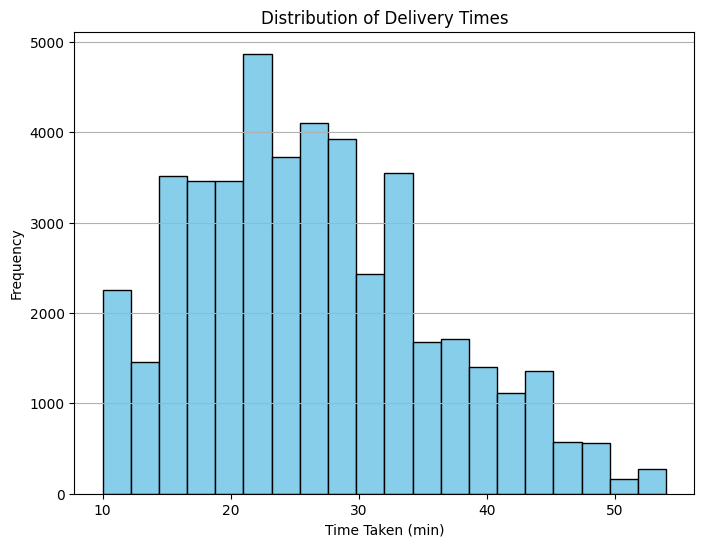

In [33]:
import matplotlib.pyplot as plt

# Visualize the distribution of delivery times
plt.figure(figsize=(8, 6))
plt.hist(data['Time_taken (min)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Times')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


/var/folders/cb/b76x0hrn7996s_ks12zkdjw80000gn/T/ipykernel_23050/172190382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=data, palette='Blues')


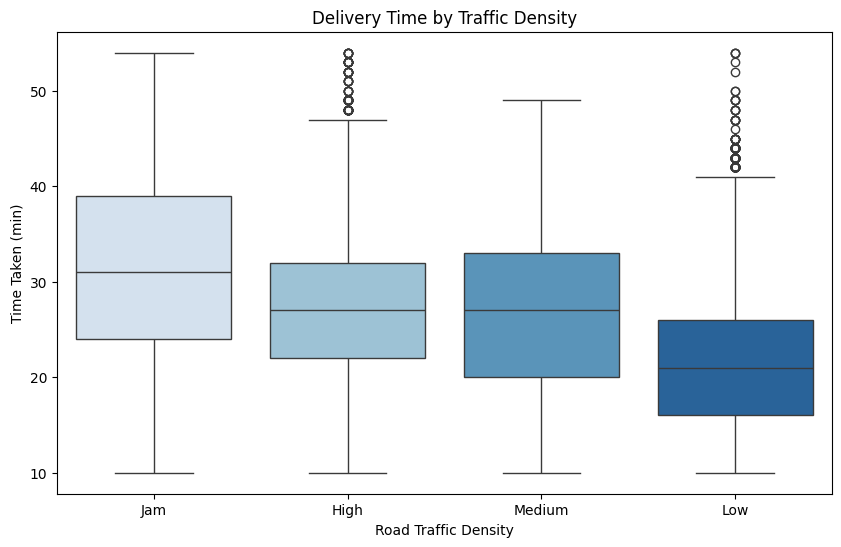

In [34]:
import seaborn as sns

# Boxplot of delivery time by traffic density
plt.figure(figsize=(10, 6))
sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=data, palette='Blues')
plt.title('Delivery Time by Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time Taken (min)')
plt.show()


/var/folders/cb/b76x0hrn7996s_ks12zkdjw80000gn/T/ipykernel_23050/3782566171.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weather_conditions', y='Time_taken (min)', data=data, estimator='mean', ci=None, palette='Set2')
/var/folders/cb/b76x0hrn7996s_ks12zkdjw80000gn/T/ipykernel_23050/3782566171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather_conditions', y='Time_taken (min)', data=data, estimator='mean', ci=None, palette='Set2')


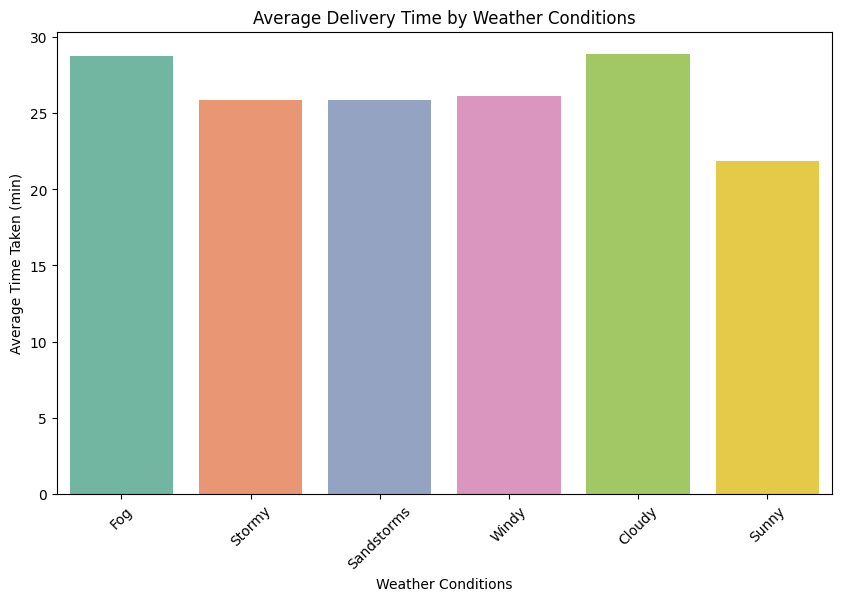

In [35]:
# Average delivery time by weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_conditions', y='Time_taken (min)', data=data, estimator='mean', ci=None, palette='Set2')
plt.title('Average Delivery Time by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)
plt.show()


In [36]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate distances
data['Distance'] = data.apply(lambda row: haversine(
    row['Restaurant_latitude'], row['Restaurant_longitude'],
    row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)
